<a href="https://colab.research.google.com/github/anurvish/Scalable_Data/blob/main/modelLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import  cross_val_score
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

In [170]:
#reading the data from CSV file
df = pd.read_csv("/content/drive/MyDrive/ML/GroupProject/final_data.csv", )
df.head()
#Obtained data preprocessing
df = df.replace(np.NaN, 0)
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
df.drop(labels=['release_date_main'],axis=1,inplace=True)
df.drop(labels=['id_main'],axis=1,inplace=True)
df.drop(labels=['runtime_main'],axis=1,inplace=True)
Independent_features = df.iloc[:,1:]
Target = df.iloc[:,0]
Independent_features = Independent_features.replace(np.nan,0)

In [171]:
#reading the data from CSV file
df = pd.read_csv("/content/drive/MyDrive/ML/GroupProject/final_data.csv", )
df.head()
#Obtained data preprocessing
df = df.replace(np.NaN, 0)
df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
df.drop(labels=['release_date_main'],axis=1,inplace=True)
df.drop(labels=['id_main'],axis=1,inplace=True)
df.drop(labels=['runtime_main'],axis=1,inplace=True)
Independent_features = df.iloc[:,1:]
Target = df.iloc[:,0]
Independent_features = Independent_features.replace(np.nan,0)

In [172]:
# calculate Variance inflation factor for the given data frame
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fitb
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


In [173]:
#setting the max rows 
pd.set_option('max_rows', 99999)
df.head(5)

,revenue_main,adult_main,budget_main,Action_genre_main,Adventure_genre_main,Animation_genre_main,Comedy_genre_main,Crime_genre_main,Documentary_genre_main,Drama_genre_main,Family_genre_main,Fantasy_genre_main,History_genre_main,Horror_genre_main,Music_genre_main,Mystery_genre_main,Romance_genre_main,Science Fiction_genre_main,TV Movie_genre_main,Thriller_genre_main,War_genre_main,Western_genre_main,collection_popularity_coll_details,popularity_crew,0_gender_crew,1_gender_crew,2_gender_crew,3_gender_crew,Directing_relevance_crew,popularity_crew_2,0_gender_crew_2,1_gender_crew_2,2_gender_crew_2,3_gender_crew_2,Directing_relevance_crew_2,popularity_crew_3,0_gender_crew_3,1_gender_crew_3,2_gender_crew_3,3_gender_crew_3,Directing_relevance_crew_3,popularity_cast,2_gender_cast,1_gender_cast,0_gender_cast,3_gender_cast,Acting_relevance_cast,popularity_cast_2,2_gender_cast_2,1_gender_cast_2,0_gender_cast_2,3_gender_cast_2,Acting_relevance_cast_2,popularity_cast_3,2_gender_cast_3,1_gender_cast_3,0_gender_cast_3,3_gender_cast_3,Acting_relevance_cast_3,popularity_cast_4,2_gender_cast_4,1_gender_cast_4,0_gender_cast_4,3_gender_cast_4,Acting_relevance_cast_4,popularity_cast_5,2_gender_cast_5,1_gender_cast_5,0_gender_cast_5,3_gender_cast_5,Acting_relevance_cast_5
0,5303,False,130178,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,33.365000,0.631,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.600,1,0,0,0,1,0.600,1,0,0,0,1,0.000,0,0,0,0,0,0.600,0,1,0,0,1,1.452,1,0,0,0,1
1,7000000,False,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,27.062667,1.967,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,8.085,0,1,0,0,1,3.798,0,1,0,0,1,4.907,1,0,0,0,1,1.626,1,0,0,0,1,0.000,0,0,0,0,0
2,42000000,False,5000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.000000,0.751,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,5.795,1,0,0,0,1,1.638,0,1,0,0,1,2.547,1,0,0,0,1,0.872,1,0,0,0,1,0.000,0,0,0,0,0
3,8900000,False,7000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,13.355000,0.000,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,5.865,0,1,0,0,1,3.550,1,0,0,0,1,2.203,1,0,0,0,1,1.879,1,0,0,0,1,0.000,0,0,0,0,0
4,127345,False,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,5.375667,0.694,0,0,1,0,1,0.0,0,0,0,0,0,0.0,0,0,0,0,0,5.881,1,0,0,0,1,1.400,0,1,0,0,1,1.166,0,1,0,0,1,0.732,0,1,0,0,1,0.000,0,0,0,0,0


In [ ]:
df_vif = calculate_vif(Independent_features,['budget_main','Action_genre_main',
       'Adventure_genre_main', 'Animation_genre_main', 'Comedy_genre_main',
       'Crime_genre_main', 'Documentary_genre_main', 'Drama_genre_main',
       'Family_genre_main', 'Fantasy_genre_main', 'History_genre_main',
       'Horror_genre_main', 'Music_genre_main', 'Mystery_genre_main',
       'Romance_genre_main', 'Science Fiction_genre_main',
       'TV Movie_genre_main', 'Thriller_genre_main', 'War_genre_main',
       'Western_genre_main', 'collection_popularity_coll_details','popularity_crew', '0_gender_crew', '1_gender_crew',
       '2_gender_crew','Directing_relevance_crew', 'popularity_crew_2',
       '0_gender_crew_2', '1_gender_crew_2', '2_gender_crew_2','Directing_relevance_crew_2', 'popularity_crew_3',
       '0_gender_crew_3', '1_gender_crew_3', '2_gender_crew_3','Directing_relevance_crew_3', 'popularity_cast',
       '2_gender_cast', '1_gender_cast', '0_gender_cast', '3_gender_cast',
       'Acting_relevance_cast', 'popularity_cast_2', '2_gender_cast_2',
       '1_gender_cast_2', '0_gender_cast_2', '3_gender_cast_2',
       'Acting_relevance_cast_2', 'popularity_cast_3', '2_gender_cast_3',
       '1_gender_cast_3', '0_gender_cast_3', '3_gender_cast_3',
       'Acting_relevance_cast_3', 'popularity_cast_4', '2_gender_cast_4',
       '1_gender_cast_4', '0_gender_cast_4', '3_gender_cast_4',
       'Acting_relevance_cast_4', 'popularity_cast_5', '2_gender_cast_5',
       '1_gender_cast_5', '0_gender_cast_5', '3_gender_cast_5',
       'Acting_relevance_cast_5'])

In [175]:
Independent_features = Independent_features[['budget_main','Action_genre_main',
       'Adventure_genre_main', 'Animation_genre_main', 'Comedy_genre_main',
       'Crime_genre_main', 'Documentary_genre_main', 'Drama_genre_main',
       'Family_genre_main', 'Fantasy_genre_main', 'History_genre_main',
       'Horror_genre_main', 'Music_genre_main', 'Mystery_genre_main',
       'Romance_genre_main', 'Science Fiction_genre_main',
       'TV Movie_genre_main', 'Thriller_genre_main', 'War_genre_main',
       'Western_genre_main', 'collection_popularity_coll_details','popularity_crew', 'popularity_crew_2', 'popularity_crew_3', 'popularity_cast', 
       'popularity_cast_2', 'popularity_cast_3', 'popularity_cast_4', 'popularity_cast_5']]

In [176]:
mms_budget = MinMaxScaler()
mms_budget.fit(Independent_features['budget_main'].to_numpy().reshape(-1,1))

mms_revenue = MinMaxScaler()
mms_revenue.fit(Target.values.reshape(-1,1))

MinMaxScaler()

In [177]:
Independent_features['budget_main'] = mms_budget.fit_transform(Independent_features['budget_main'].to_numpy().reshape(-1,1))
Target = mms_revenue.fit_transform(Target.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
#splitting the final data into train and test data 
xtrain, xtest, ytrain, ytest = train_test_split(Independent_features, Target, test_size=0.2)

In [179]:
C_para = [0.1, 1, 50, 100, 500, 1000, 5000, 10000]
#C_para = [0.001, 0.005, 0.01, 0.05, 0.08, 0.1]
alpha_para = [1/(2*C) for C in C_para]

In [ ]:
#Performing Lesso regression on data
model_list = [Lasso(alpha=alpha) for alpha in alpha_para]
testPred_df = pd.DataFrame()
trainPred_df = pd.DataFrame()

for i,model in enumerate(model_list):
    model.fit(xtrain,ytrain)
    predCol = f'model_{i+1}'
    print(model.predict(xtest))
    testPred_df[predCol] = model.predict(xtest)
    trainPred_df[predCol] = model.predict(xtrain) 
    print(f'Model being processed {i}')
    print(f'Test R_Square: {result_test.rsquared} & Adjusted R Square {result_test.rsquared_adj}')
    print(f'Train R_Square: {result_train.rsquared} & Adjusted R Square {result_train.rsquared_adj}')
    print(f'Test Mean squared error: {mean_squared_error(ytest, testPred_df[predCol])} & Mean Absulute error: {mean_absolute_error(ytest, testPred_df[predCol])}')
    print(f'Train Mean squared error: {mean_squared_error(ytrain, trainPred_df[predCol])} &  Mean Absulute error: {mean_absolute_error(ytrain, trainPred_df[predCol])}')
    #RMSE
    print(f'Test RMSE :{np.square(np.subtract(ytest, model.predict(xtest))).mean()}')
    print(f'Train RMSE : {np.square(np.subtract(ytrain, model.predict(xtrain) )).mean()}')
    print('\n\n')

[0.1, 1, 50, 100, 500, 1000, 5000, 10000]
[0.003294555983930378, 0.003294555983930378, 0.003040008102910858, 0.0029347852744675594, 0.0018198224185908712, 0.0015963297182892179, 0.001511782587849091, 0.0015089701122403658]
[0.002799269681971032, 0.002799269681971032, 0.002626676801359609, 0.0025219844267042246, 0.0016163832188807064, 0.0012843117605380234, 0.0011073833589468121, 0.0010889095918678272]


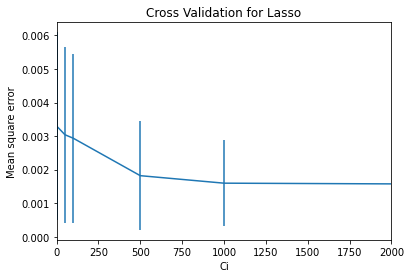

In [184]:
#ploting the mean and standard daviation value for Lasso Regression
mean_error=[]; std_error=[]
for model in model_list:
  temp=[]
  kf = KFold(n_splits=5)
  for train, test in kf.split(Independent_features):
    model.fit(Independent_features.iloc[train], Target[train])
    ypred = model.predict(Independent_features.iloc[test])
    temp.append(mean_squared_error(Target[test],ypred))
  mean_error.append(np.array(temp).mean())
  std_error.append(np.array(temp).std())

print(C_para)
print(mean_error)
print(std_error)
plt.errorbar(C_para,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0,2000))
plt.title('Cross Validation for Lasso')
plt.show()